<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/02_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#interquartile range
https://en.wikipedia.org/wiki/Interquartile_range
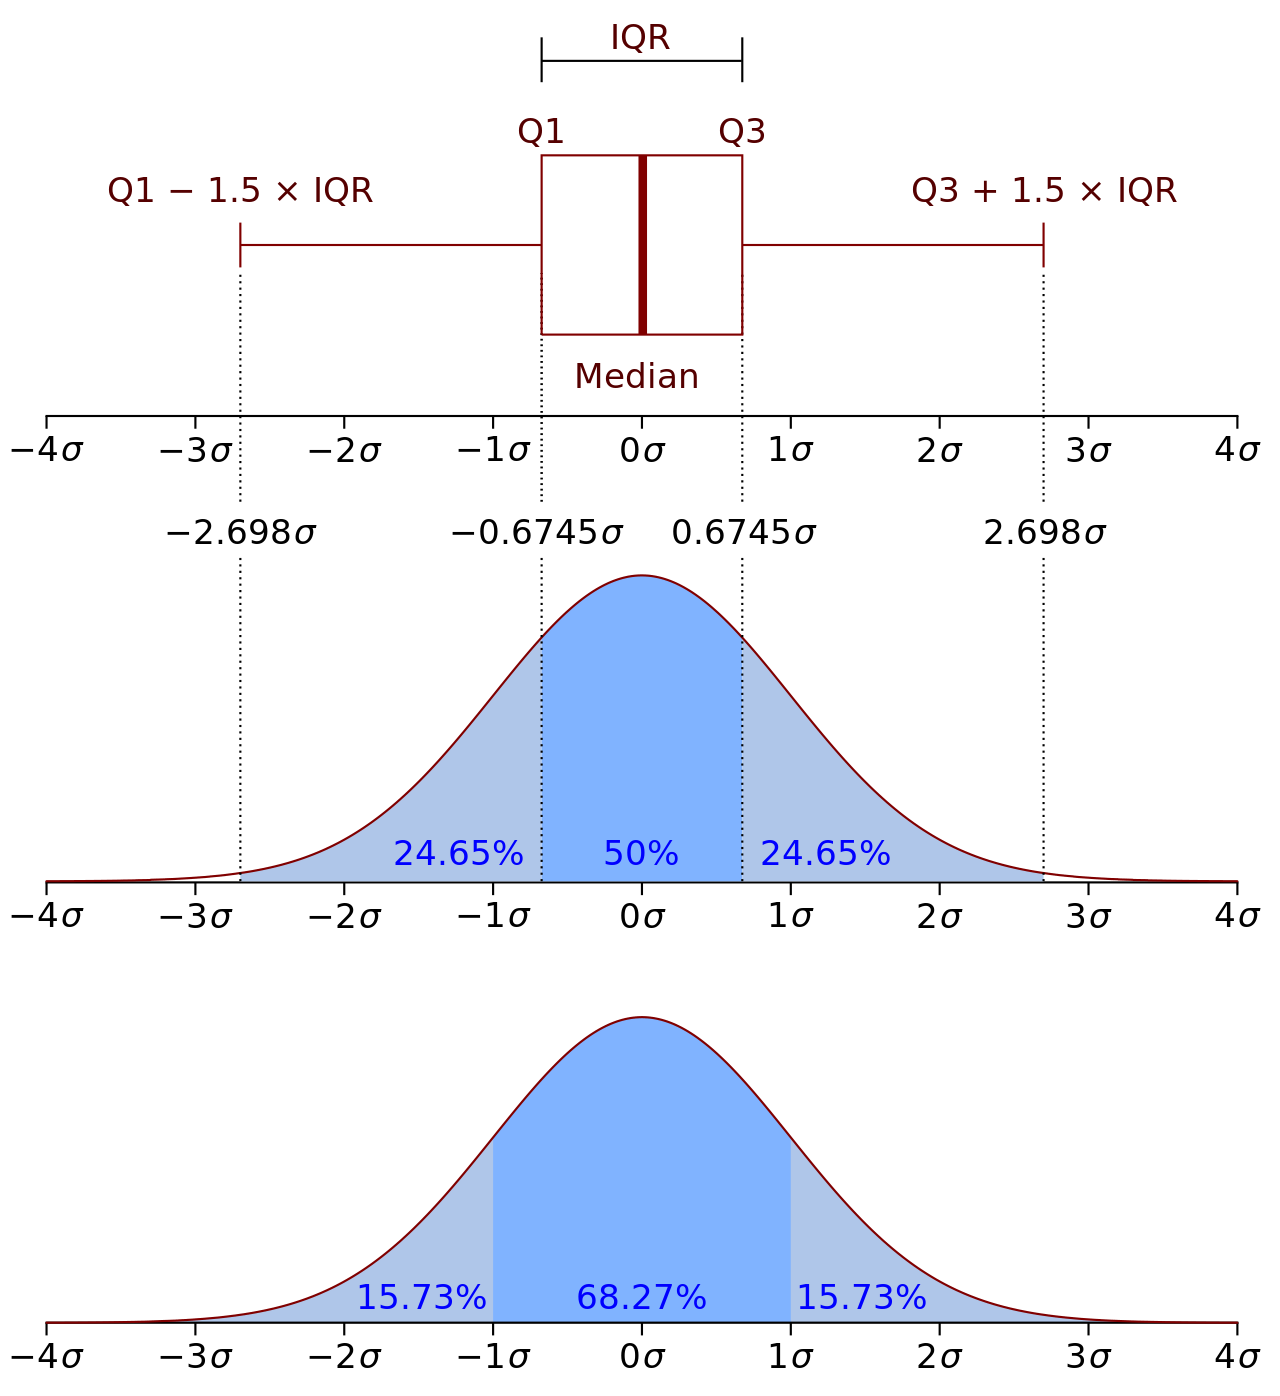

In [6]:
np.random.seed(42)
arr = np.random.randint(1, 101, 100)
arr

array([ 52,  93,  15,  72,  61,  21,  83,  87,  75,  75,  88, 100,  24,
         3,  22,  53,   2,  88,  30,  38,   2,  64,  60,  21,  33,  76,
        58,  22,  89,  49,  91,  59,  42,  92,  60,  80,  15,  62,  62,
        47,  62,  51,  55,  64,   3,  51,   7,  21,  73,  39,  18,   4,
        89,  60,  14,   9,  90,  53,   2,  84,  92,  60,  71,  44,   8,
        47,  35,  78,  81,  36,  50,   4,   2,   6,  54,   4,  54,  93,
        63,  18,  90,  44,  34,  74,  62, 100,  14,  95,  48,  15,  72,
        78,  87,  62,  40,  85,  80,  82,  53,  24])

In [9]:
Q = np.percentile(arr, [25, 50, 75]) #25%, 75%
Q

array([23.5, 54. , 76.5])

In [10]:
q1, q2, q3 = Q[0], Q[1], Q[2]

In [11]:
IQR = q3 - q1

In [14]:
lfence = q1 - 1.5*IQR
ufence = q3 + 1.5*IQR
lfence, ufence #해당 범위 바깥의 값 = outlier = 이상치

(-56.0, 156.0)

In [21]:
arr[30] = 253

In [15]:
#boolean indexing 사용
arr < lfence #이상치 없음

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [16]:
arr > ufence #이상치 없음

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [22]:
(arr < lfence) | (arr > ufence)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [23]:
outliers = arr[(arr < lfence) | (arr > ufence)] #이상치 없음 -> 30번에 넣어봄
outliers

array([253])

In [29]:
normals = arr[(arr >= lfence) & (arr <= ufence)] #정상치만 모으기
normals

array([ 52,  93,  15,  72,  61,  21,  83,  87,  75,  75,  88, 100,  24,
         3,  22,  53,   2,  88,  30,  38,   2,  64,  60,  21,  33,  76,
        58,  22,  89,  49,  59,  42,  92,  60,  80,  15,  62,  62,  47,
        62,  51,  55,  64,   3,  51,   7,  21,  73,  39,  18,   4,  89,
        60,  14,   9,  90,  53,   2,  84,  92,  60,  71,  44,   8,  47,
        35,  78,  81,  36,  50,   4,   2,   6,  54,   4,  54,  93,  63,
        18,  90,  44,  34,  74,  62, 100,  14,  95,  48,  15,  72,  78,
        87,  62,  40,  85,  80,  82,  53,  24])

#전처리

In [4]:
%run my_init.py

Mounted at /content/drive


In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]